In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

/tmp/ipykernel_10118/527951611.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Primeira visualizaçao da base, observando um resumo e titulos de colunas.

In [6]:
df = pd.read_csv('DelayedFlights.zip')
print(df.columns)
print("____________________________________________________________________________________")
print(df)
print("____________________________________________________________________________________")
df.info()

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')
____________________________________________________________________________________
         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0                 0  2008      1           3          4   2003.0        1955   
1                 1  2008      1           3          4    754.0         735   
2                 2  2008      1           3          4    628.0         620   
3                 4  2008      1           3          4   1829.0        1755   
4                 5  2008      1           3     

Visualizar atrasos por Companhia aerea, origem, destino.
Também queremos observar quais companhias mais tem voos cancelados.

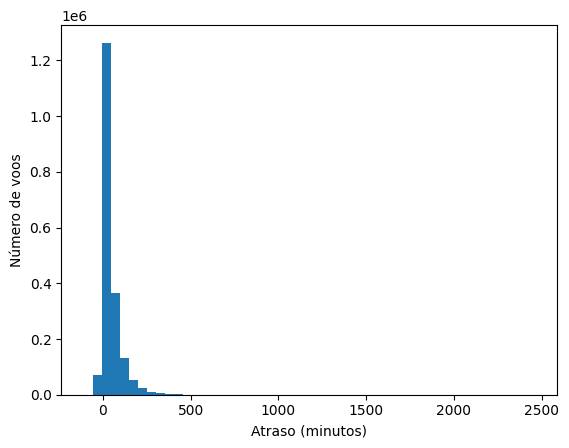

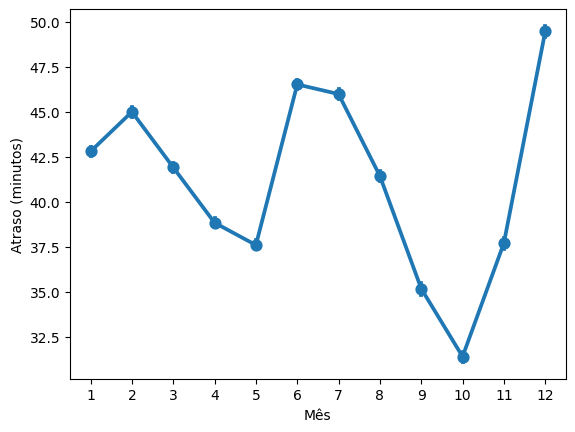

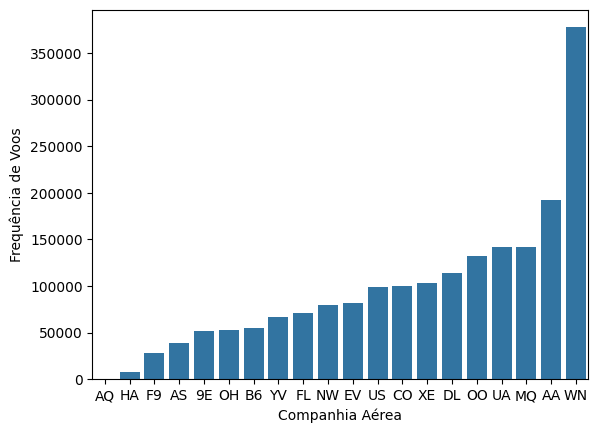

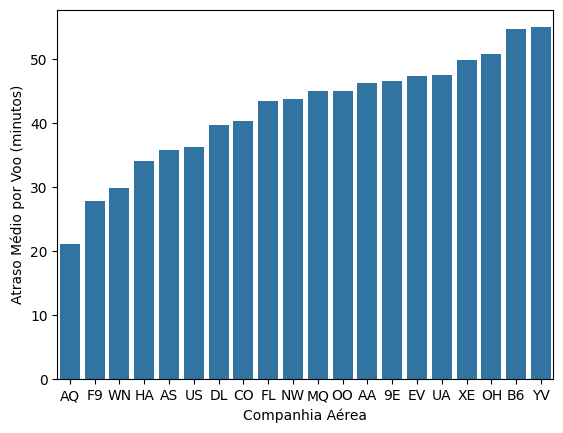

In [10]:
df_atrasos = df[['ArrDelay', 'DayOfWeek', 'Month', 'UniqueCarrier', 'Origin', 'Dest', 'CarrierDelay', 'Cancelled']]

# Grafico de colunas, atrasos por voos
plt.hist(df_atrasos["ArrDelay"], bins=50)
plt.xlabel("Atraso (minutos)")
plt.ylabel("Número de voos")
plt.show()

# Grafico de atraso por mês
sns.pointplot(x="Month", y="ArrDelay", data=df_atrasos)
plt.xlabel("Mês")
plt.ylabel("Atraso (minutos)")
plt.show()

# Grafico de atraso por companhia aérea
df_atrasos.groupby("UniqueCarrier")["ArrDelay"].mean().sort_values(ascending=True).head(10)

sns.countplot(x='UniqueCarrier', data=df, order=df['UniqueCarrier'].value_counts().sort_values().index)
plt.xlabel('Companhia Aérea')
plt.ylabel('Frequência de Voos')
plt.show()

# Cálculo do atraso acumulado e médio por companhia aérea
df_atrasos_cia = df.groupby('UniqueCarrier')['ArrDelay'].sum()
df_atrasos_cia_media = df_atrasos_cia / df.groupby('UniqueCarrier').size()

# Ordenação por atraso médio crescente
df_atrasos_cia_media = df_atrasos_cia_media.sort_values(ascending=True)

# Criação do gráfico de barras
sns.barplot(x=df_atrasos_cia_media.index, y=df_atrasos_cia_media)

# Adição de rótulos aos eixos
plt.xlabel('Companhia Aérea')
plt.ylabel('Atraso Médio por Voo (minutos)')

# Exibição do gráfico
plt.show()